## Sarcasm Detection on YouTube comments

### Loading the dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


In [5]:
data_frame = pd.read_csv('/content/preprocessed_dataset.csv')

In [6]:
data_frame

,labels,cleaned_comment
0,1,user thanks showing appointment today
1,1,haha lol
2,1,love waiting num min cab shortage user please ...
3,1,22 super funny quote funnyquotes funnysayings ...
4,1,goog morning sorrynotsorry morning
...,...,...
19415,0,good read
19416,0,people living condition always remember blesse...
19417,0,winner seungyoon simple rt u save repost edit ...
19418,0,ok concept kravitz passing note magnus julia p...


### Partitioning the data into training and Validation

In [7]:
# Split the data into training and validation sets
train_df, val_df = train_test_split(data_frame, test_size=0.2, random_state=42)



In [8]:
# Reset the index for both DataFrames
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [9]:
train_df

,labels,cleaned_comment
0,0,regret slightest
1,1,former homeowner send back got back great cust...
2,0,lmao made
3,0,black
4,0,end dog fighting
...,...,...
15531,0,thanks user team 4k medium finally unlock secr...
15532,0,question og color jordan 1 stock store time retro
15533,1,ha sound right
15534,1,modern versioning date unbelievable realmagento


In [10]:
#saving the validation dataset
train_df.to_csv('sarcasm_detection.csv')

In [11]:
val_df.head()

,labels,cleaned_comment
0,0,took 2 year put gladly spend next 2 colombia l...
1,0,spent 10 min playing dog looked like happy hum...
2,1,download problem tag theamazinggag theamazinga...
3,1,truth toofunny willandgrace handersen 79
4,1,editing b bad il justify later life chat emoti...


In [12]:
#saving the validation dataset
val_df.to_csv('validation.csv')

In [13]:
df = train_df.copy()

In [14]:
df.head()

,labels,cleaned_comment
0,0,regret slightest
1,1,former homeowner send back got back great cust...
2,0,lmao made
3,0,black
4,0,end dog fighting



### Tokenization and Lemmatization:
**Tokenization:** Splitting text into individual words or tokens.





**Lemmatization:** Converting tokens to their base or root forms. For example, "running" becomes "run" after lemmatization.







In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [17]:

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [18]:

# Apply preprocessing to the comments
df['cleaned_comment'] = df['cleaned_comment'].apply(preprocess_text)

In [19]:
# Filter out rows where 'cleaned_comment' is empty
df = df[df['cleaned_comment'].str.strip() != '']


In [20]:

# Display the first few rows of the preprocessed dataset
df.head()


,labels,cleaned_comment
0,0,regret slightest
1,1,former homeowner send back got back great cust...
2,0,lmao made
3,0,black
4,0,end dog fighting


# TF-IDF

TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). The TF-IDF score increases proportionally to the number of times a word appears in a document and is offset by the frequency of the word in the corpus.

### Formula:

**Term Frequency (TF):**

\[ \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d} \]

**Inverse Document Frequency (IDF):**

\[ \text{IDF}(t, D) = \log \left( \frac{\text{Total number of documents } D}{\text{Number of documents containing term } t} \right) \]

**TF-IDF:**

\[ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D) \]


In [21]:
# Define the text and target columns
text_column = 'cleaned_comment'
target_column = 'labels'

In [22]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df[text_column])
y = df[target_column]

In [23]:

# Apply SMOTE to the TF-IDF vectorized data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [24]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [25]:
import pickle
# Save the preprocessed data and vectorizer into a pickle file
with open('tfidf_smote_preprocessed_data.pkl', 'wb') as file:
    pickle.dump((tfidf_vectorizer, X_train, X_test, y_train, y_test), file)

In [26]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score

# Load the preprocessed data from the pickle file
with open('tfidf_smote_preprocessed_data.pkl', 'rb') as file:
    tfidf_vectorizer, X_train, X_test, y_train, y_test = pickle.load(file)

# Convert the sparse matrix to a dense matrix (if memory allows)
X_train = X_train.toarray()
X_test = X_test.toarray()



## Feedforward Neural Network (FNN)

A Feedforward Neural Network (FNN) is a type of artificial neural network where connections between nodes do not form a cycle. Information flows in one direction, from input nodes through intermediate (hidden) nodes to output nodes. Each layer of nodes (input, hidden, and output) is fully connected to the next layer, and computations are performed sequentially without feedback loops. FNNs are commonly used for tasks such as classification and regression in machine learning.


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the model with reduced dropout layers
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # Reduced dropout rate
model.add(Dense(768, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))  # Reduced dropout rate
model.add(Dense(384, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              5121024   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 768)               787200    
                                                                 
 dense_2 (Dense)             (None, 512)               393728    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 384)               196992    
                                                                 
 dense_4 (Dense)             (None, 256)               9

In [28]:


# Early stopping and learning rate reduction callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, cooldown=1)



In [29]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])



Epoch 1/20
222/222 [==============================] - 9s 12ms/step - loss: 0.5311 - accuracy: 0.7237 - val_loss: 0.4607 - val_accuracy: 0.7833 - lr: 0.0010
Epoch 2/20
222/222 [==============================] - 2s 10ms/step - loss: 0.2849 - accuracy: 0.8843 - val_loss: 0.4609 - val_accuracy: 0.7952 - lr: 0.0010
Epoch 3/20
222/222 [==============================] - 2s 7ms/step - loss: 0.1286 - accuracy: 0.9472 - val_loss: 0.7175 - val_accuracy: 0.7904 - lr: 0.0010
Epoch 4/20
222/222 [==============================] - 2s 8ms/step - loss: 0.0659 - accuracy: 0.9697 - val_loss: 0.9553 - val_accuracy: 0.7794 - lr: 0.0010
Epoch 5/20
222/222 [==============================] - 2s 7ms/step - loss: 0.0370 - accuracy: 0.9811 - val_loss: 1.4080 - val_accuracy: 0.7825 - lr: 1.0000e-04
Epoch 6/20
222/222 [==============================] - 2s 8ms/step - loss: 0.0321 - accuracy: 0.9828 - val_loss: 1.5836 - val_accuracy: 0.7867 - lr: 1.0000e-04


In [30]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict on test data
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred)
print(f"Test F1 Score: {f1}")

from sklearn.metrics import classification_report
# Print classification report
print(classification_report(y_test, y_test_pred))

111/111 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7833
Test Loss: 0.46074697375297546
Test Accuracy: 0.7833333611488342
111/111 [==============================] - 0s 2ms/step
Test F1 Score: 0.783026874115983
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1813
           1       0.77      0.80      0.78      1727

    accuracy                           0.78      3540
   macro avg       0.78      0.78      0.78      3540
weighted avg       0.78      0.78      0.78      3540



Confusion Matrix:
[[1389  424]
 [ 343 1384]]
True Negatives: 1389
False Positives: 424
False Negatives: 343
True Positives: 1384


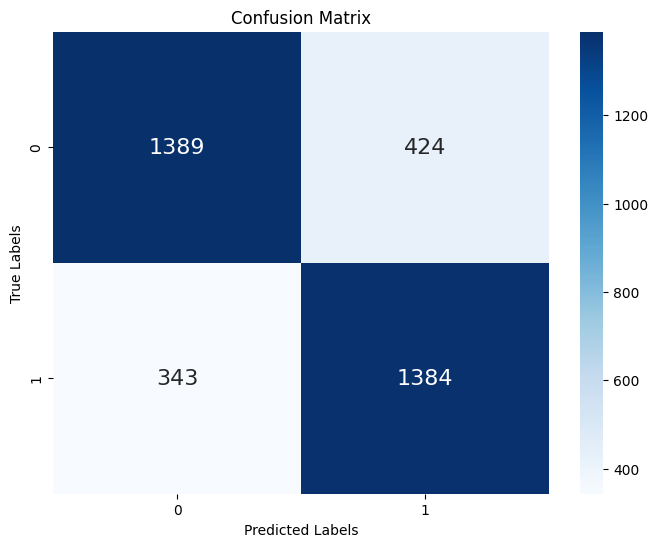

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate and print individual components
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Model Evaluation Summary

- **Accuracy:** 78.33%
- **Precision (Class 0/Non-sarcastic):** 0.80
- **Precision (Class 1/Sarcastic):** 0.77
- **Recall (Class 0/Non-sarcastic):** 0.77
- **Recall (Class 1/Sarcastic):** 0.80
- **F1-score:** 0.783

The model demonstrates effective performance in distinguishing between sarcastic and non-sarcastic comments, achieving balanced precision and recall rates. Further optimization in model tuning and data preprocessing could enhance overall accuracy and precision.
